In [21]:
from NN_Thesis.nn_classes import *
from NN_Thesis.trainer import *

import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
from torch import optim


from torchvision.transforms import transforms
import numpy as np
import os
from PIL import Image
import random

from matplotlib import pyplot as plt


[0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1]


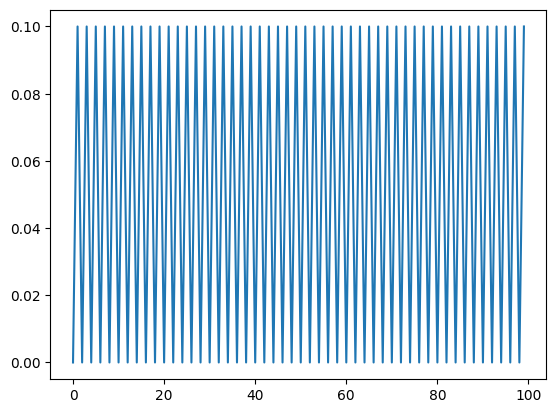

In [20]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=1, eta_min=0)
lrs = []

for i in range(100):
    for i in range(100):
        optimizer.step()
        # lrs.append(optimizer.param_groups[0]["lr"])
    #     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()
    lrs.append(scheduler.get_last_lr()[0])

plt.plot(lrs)
print(lrs)

In [2]:
batch_size = 16

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

transform = transforms.Compose([transforms.ToTensor(),\
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),\
                              transforms.ConvertImageDtype(dtype = torch.float32)])
train = torchvision.datasets.CIFAR10(root ='./data',train = True, download = True,transform = transform)

trainloader = torch.utils.data.DataLoader(train,batch_size = batch_size,shuffle= True, num_workers = 0)
os.listdir('./data')

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [60]:
import torch
from torch.autograd import Variable

class mySign(torch.autograd.Function):
    @staticmethod
    def forward(self,input):
        return torch.sign(input)
    @staticmethod
    def backward(self,grad_output):
        print(grad_output)
        return grad_output



In [79]:
x = torch.tensor([1.,2.,-1.],requires_grad=True)

f = mySign().apply

a = f(x)

In [80]:
c = a

In [81]:
d = c.sum()
d

tensor(1., grad_fn=<SumBackward0>)

In [82]:

d.backward()

tensor([1., 1., 1.])


In [77]:
x.grad

tensor([5., 5., 5.])

In [4]:
trainer.epoch_losses

In [5]:
#Make a custom module

In [6]:

class scalarLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.k = nn.Parameter(torch.tensor([-5.0]))
    def forward(self,x,toBin):
        
        
        if toBin:
            temp = self.k.data.clone()

            print(self.k.data)

            self.k.data = torch.sign(self.k.data)
            out = self.k*x
            self.k.data = temp
            print('\n\n')
        
        else:
            out = self.k*x
        
        return out
#         return (self.k*x)
        
        

m = scalarLayer()
loss_F = F.mse_loss
# opt = optim.SGD(m.parameters())

In [7]:

m = scalarLayer()
m2 = scalarLayer()
loss_F = F.mse_loss
loss_F2 = F.mse_loss
# print(m.k.item())
# x= torch.tensor([2.0])
x = torch.ones(2,1)

# print(x.shape)
out = m(x,toBin = True)
out2 = m2(x,toBin = False)

# print(out)
pred = torch.unsqueeze(torch.tensor([10.0,5.0]),1)

# print(pred.shape)
loss = loss_F(out,pred)
loss2 = loss_F2(out2,pred)
loss.backward()
loss2.backward()

with torch.no_grad():
    for p,q in zip(m.parameters(),m2.parameters()):
        print(p.grad,p,end = '\n\n')
        
        print(q.grad,q)
        p-= p.grad*0.0001
#         print(p)
        m.zero_grad()

tensor([-5.])



tensor([-17.]) Parameter containing:
tensor([-5.], requires_grad=True)

tensor([-25.]) Parameter containing:
tensor([-5.], requires_grad=True)


In [8]:

def binarise_layer(layer,*args,**kwargs):
    #Takes in a module and binarises the forward pass
    class binary_layer(layer):
        def __init__(self,*args,**kwargs):
            #Recreate the layer properties
            super().__init__(*args,**kwargs)
            
            #We need the original forward function
            self.org_forward = super().forward
            
            self.has_weight = False
            self.has_bias = False 
            
                        
            if hasattr(self,'weight'):
                self.org_weight_data = self.weight.data
                self.has_weight = True
            if hasattr(self,'bias'):
                self.org_bias_data = self.bias.data
                self.has_bias = True
        def forward(self,x):
            #Can replace with for loop over layer.parameters()?
            #Replace the weights and biases with binarisation and then return them to orig after
#             if self.has_weight:
            self.org_weight_data = self.weight.data
            self.weight.data = torch.sign(self.weight.data)
#             if self.has_bias:
            self.org_bias_data = self.bias.data
            self.bias.data = torch.sign(self.bias.data)
            out = self.org_forward(x)
#             print(self.org_forward)
            #Replace the weights with original weights
            self.weight.data = self.org_weight_data
            self.bias.data = self.org_bias_data
            return out
    return binary_layer(*args,**kwargs)
            
            
            

m = nn.Conv2d

b = binarise_layer(m,3,1,3)
x = torch.randn(1,3,3,3)
print(x.shape)
# for p in b.parameters():
#     print(p.data) 
b(x)
print(b.forward)

torch.Size([1, 3, 3, 3])
<bound method binarise_layer.<locals>.binary_layer.forward of binary_layer(3, 1, kernel_size=(3, 3), stride=(1, 1))>


In [21]:
k = nn.BatchNorm2d(3)
l = nn.Conv2d(3,3,3)


s = nn.Sequential(l,k)

isinstance(l,nn.Conv2d)

True

In [43]:
def convert_to_binary(module):
    
    
    def binary_forward(self):
        
        def forward(x):
            self.org_weight_data = self.weight.data
            self.weight.data = torch.sign(self.weight.data)
    #             if self.has_bias:
            self.org_bias_data = self.bias.data
            self.bias.data = torch.sign(self.bias.data)

            out = self.org_forward(x)
            print(self.org_forward)
            #Replace the weights with original weights
            self.weight.data = self.org_weight_data
            self.bias.data = self.org_bias_data
            return out
        return forward
    
    
    
        
    
    if isinstance(module,(nn.Conv2d,nn.Linear)):
        module.org_weight_data = module.weight.data
        module.org_bias_data = module.bias.data
        module.org_forward = self.forward
        module.forward = binary_forward(module)
        
    else:
        raise ValueError('Currently only accepts conv2d and linear layers')
        

n = nn.Conv2d(3,3,3)

convert_to_binary(n)

x = torch.ones(1,3,3,3)

vars(n)
n(x)


AttributeError: 'function' object has no attribute 'clone'